In [5]:
import pandas as pd
import numpy as np
from collections import Counter

In [6]:
data_file = "idea-changes/file_changes_{}.csv"
data_count = 72

count = 0
creations = 0
deletions = 0
changes = 0

author_counts = Counter()
email_counts = Counter()

In [8]:
methods = pd.read_csv('idea-changes/method_ids.csv', sep=';', index_col=0)

In [9]:
methods.head()

,count,enclosingClass,classType,methodName,argTypes
id,,,,,
648804,1,IndexingFinishedListener,INNER,indexingFinished,VirtualFile
385854,2,ColorsTable,STATIC_NESTED,removeSelected,NaN
391468,1,GroovyOverlyNestedMethodInspectionBase,TOP_LEVEL,GroovyOverlyNestedMethodInspectionBase,NaN
519808,3,ReformatCodeActionInEditorTest,TOP_LEVEL,testFormatSelection_DoNotTouchTrailingWhiteSpaces,NaN
424186,2,CommitHelper,TOP_LEVEL,reportResult,NaN


In [16]:
methods[methods['count'] > 200]

,count,enclosingClass,classType,methodName,argTypes
id,,,,,
772,240,PyExtractMethodUtil,ANONYMOUS,run,NaN
40275,230,FileEditorManagerImpl,ANONYMOUS,run,NaN
17856,273,TypedHandler,TOP_LEVEL,execute,"Editor,char,DataContext"
15212,366,Test,TOP_LEVEL,bar,NaN
2524,212,Visitor,STATIC_NESTED,visitPyClass,PyClass
97890,294,SvnAuthenticationTest,ANONYMOUS,run,NaN
24237,10566,A,TOP_LEVEL,foo,NaN
6175,340,CodeInsightTestFixtureImpl,ANONYMOUS,run,NaN
18716,446,CodeCompletionHandlerBase,ANONYMOUS,run,NaN


In [26]:
methods[['count', 'classType']].groupby('classType').agg('sum').sort_values(by=['count'])

,count
classType,
LOCAL,1849
INNER,130140
STATIC_NESTED,222135
ANONYMOUS,295365
TOP_LEVEL,2144514


In [20]:
nodes = pd.read_csv('idea-changes/node_types.csv', sep=',', index_col=0)

In [21]:
nodes.head()

,count,type,direction
id,,,
47,8490501,EnhancedForStatement,DOWN
164,40,IntersectionType,DOWN
75,2515655,TryStatement,DOWN
5,2165118,Dimension,DOWN
154,2454,SuperFieldAccess,DOWN


In [24]:
nodes.groupby('type').agg('sum').sort_values(by=['count']).iloc[-10:]

,count
type,
ExpressionStatement,86192056
IfStatement,86252103
InfixExpression,89996294
VariableDeclarationFragment,102118601
SimpleType,107356043
VariableDeclarationStatement,128502154
MethodDeclaration,128880632
Block,216486564
MethodInvocation,382562036


In [23]:
nodes.sort_values(by=['count']).iloc[:10]

,count,type,direction
id,,,
164,40,IntersectionType,DOWN
163,44,IntersectionType,UP
165,74,TypeMethodReference,UP
160,102,NameQualifiedType,DOWN
159,105,NameQualifiedType,UP
166,115,TypeMethodReference,DOWN
161,255,SuperMethodReference,DOWN
162,265,SuperMethodReference,UP
154,2454,SuperFieldAccess,DOWN


In [41]:
def read_tokens(token_file):
    with open(token_file, 'r') as f:
        indices = []
        counts = []
        tokens = []
        for line in f:
            if not ',' in line:
                tokens[-1] += line
                continue
            ind, cnt, token = line.split(',', 2)
            indices.append(ind)
            counts.append(cnt)
            tokens.append(token)
        for i in range(len(tokens)):
            tokens[i] = tokens[i][:-1]
        return indices, counts, tokens

In [42]:
_indices, _counts, _tokens = read_tokens('idea-changes/tokens.csv')
tokens = pd.DataFrame(data={_tokens[0]: _tokens[1:], _counts[0]: _counts[1:]}, index=_indices[1:])
tokens[_counts[0]] = tokens[_counts[0]].astype(int)

In [43]:
tokens.head()

,count,value
2,29327284,
399863,8,the window content to find a window or
670447,16,areaInstance
682554,6,""" TestClassTwo testClassTwo =\n"""
577318,12,"""fu10_values.xml"""


In [103]:
tokens.sort_values(by=['count'], ascending=False).iloc[:30]

,count,value
2,29327284,
35,24446799,final
168,10986418,String
16,10901588,public
17,8467075,void
31,7180183,0
3,6694209,NotNull
48,5908459,int
83,5134265,boolean
34,4863786,Override


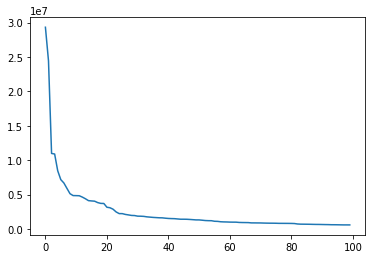

In [105]:
import matplotlib.pyplot as plt
plt.plot(range(100), tokens.sort_values(by=['count'], ascending=False).iloc[:100]['count'])

In [101]:
tokens[np.logical_or(tokens['value'] == 'override', tokens['value'] == 'Override')]

,count,value
34,4863786,Override
16858,4800,override


In [106]:
tokens[tokens['value'] == 'private']

,count,value
13,1838088,private


In [93]:
tokens.sort_values(by=['count']).iloc[:10]

,count,value
401613,1,ExtInner
642262,1,NodeRendererManager
674885,1,isSpecificCoverageAttach
484704,1,InstanceVariableInitialization
216105,1,addFieldName
680069,1,getWithMembers
241290,1,"""VBox can't be cut"""
571187,1,addExtensionPoint
476386,1,ClearStateVisitor
626741,1,methodFromX


In [27]:
paths = pd.read_csv('idea-changes/path_ids.csv', sep=',', index_col=0)

In [28]:
paths.head()

,count,nodeTypes
id,,
146529,11,57 37 39 29 26 77 42 56
119050,3,11 41 76 29 26 31
228691,16,57 41 69 41 41 37 39 29 26 44 10
32806,3754,1 2 35 70 33 30
46892,18,1 91 29 72 74 75 73 26 27 17 56


In [63]:
def path2string(node_types):
    v_indices = list(map(int, node_types.split(' ')))
    v_names = list(map(
        lambda ind: "{}:{}".format(
            nodes.loc[ind]['type'], 
            nodes.loc[ind]['direction']
        ),
        v_indices
    ))
    return ', '.join(v_names)
    
def context2string(context):
    tok1, p, tok2 = context
    return '{}\n{}\n{}'.format(tokens[tok1], path2string(p), tokens[tok2])

In [56]:
path2string(paths.loc[100]['nodeTypes'])

'SimpleName:UP, InfixExpression:UP, InfixExpression:DOWN, InfixExpression:DOWN, NumberLiteral:DOWN'

In [69]:
top_paths = paths.sort_values(by=['count']).iloc[-10:]
top_paths['pathString'] = top_paths['nodeTypes'].map(path2string)
for index, row in top_paths.iterrows():
    print(row['count'], row['pathString'])

2890306 Modifier:UP, VariableDeclarationStatement:UP, VariableDeclarationStatement:DOWN, VariableDeclarationFragment:DOWN, SimpleName:DOWN
3796706 Modifier:UP, MethodDeclaration:UP, MethodDeclaration:DOWN, SimpleName:DOWN
3967616 SimpleName:UP, SimpleType:UP, SingleVariableDeclaration:UP, SingleVariableDeclaration:DOWN, SimpleName:DOWN
4471946 SimpleName:UP, SimpleType:UP, VariableDeclarationStatement:UP, VariableDeclarationStatement:DOWN, VariableDeclarationFragment:DOWN, SimpleName:DOWN
4711264 SimpleName:UP, MethodInvocation:UP, ExpressionStatement:UP, Block:UP, Block:DOWN, ExpressionStatement:DOWN, MethodInvocation:DOWN, SimpleName:DOWN
4769638 SimpleName:UP, SimpleType:UP, VariableDeclarationStatement:UP, VariableDeclarationStatement:DOWN, VariableDeclarationFragment:DOWN, MethodInvocation:DOWN, SimpleName:DOWN
6052281 SimpleName:UP, MethodInvocation:UP, MethodInvocation:UP, MethodInvocation:DOWN, SimpleName:DOWN
7894239 SimpleName:UP, VariableDeclarationFragment:UP, VariableDecla

In [74]:
rare_paths = paths.sort_values(by=['count']).iloc[:10]
rare_paths['pathString'] = rare_paths['nodeTypes'].map(path2string)
for index, row in rare_paths.iterrows():
    print(row['count'], row['pathString'])

1 EmptyStatement:UP, Block:UP, CatchClause:UP, TryStatement:UP, Block:UP, CatchClause:UP, TryStatement:UP, TryStatement:DOWN, CatchClause:DOWN, SingleVariableDeclaration:DOWN, SimpleName:DOWN
1 ContinueStatement:UP, Block:UP, IfStatement:UP, Block:UP, Block:DOWN, SwitchStatement:DOWN, ReturnStatement:DOWN
1 QualifiedName:UP, SwitchCase:UP, SwitchStatement:UP, SwitchStatement:DOWN, ExpressionStatement:DOWN, MethodInvocation:DOWN, NullLiteral:DOWN
1 StringLiteral:UP, MethodInvocation:UP, ExpressionStatement:UP, Block:UP, LambdaExpression:UP, VariableDeclarationFragment:UP, VariableDeclarationStatement:UP, Block:UP, Block:DOWN, ReturnStatement:DOWN, SimpleName:DOWN
1 SimpleName:UP, VariableDeclarationFragment:UP, VariableDeclarationStatement:UP, Block:UP, Block:DOWN, IfStatement:DOWN, InstanceofExpression:DOWN, MethodInvocation:DOWN, FieldAccess:DOWN, SimpleName:DOWN
1 NumberLiteral:UP, InfixExpression:UP, MethodInvocation:UP, Assignment:UP, ExpressionStatement:UP, Block:UP, IfStatement:U